In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install openpyxl
!pip install dash_bio
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 242 kB 593 kB/s            
     |████████████████████████████████| 10.2 MB 595 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 7.3 MB 28.7 MB/s            
     |████████████████████████████████| 278 kB 71.2 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 2.6 MB 53.8 MB/s            
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 686 kB 35.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 357 kB 61.4 MB/s            
  Created wheel for dash-bio: filename=dash_bio-1.0.1-py3-none-any.whl size=10337987 sha256=0ccb239fc4aba32bc0c6d31d30023de596097d03e815e14781ac28d8549a4318
  Stored in directory: /root/.cache/pip/wh

/kaggle/input/cve-and-cwe-mapping-dataset/synonym_mapping.json
/kaggle/input/cve-and-cwe-mapping-dataset/Global_Dataset.xlsx
/kaggle/input/cve-and-cwe-mapping-dataset/Research Concept/RC_cwe_paths.xlsx
/kaggle/input/cve-and-cwe-mapping-dataset/Research Concept/tree_structure.json
/kaggle/input/cve-and-cwe-mapping-dataset/Research Concept/RC_CWEs.csv
/kaggle/input/cve-and-cwe-mapping-dataset/Research Concept/RC_Vulnerability_Dataset.xlsx
/kaggle/input/cve-and-cwe-mapping-dataset/Software Development/tree_structure.json
/kaggle/input/cve-and-cwe-mapping-dataset/Software Development/SD_cwe_paths.xlsx
/kaggle/input/cve-and-cwe-mapping-dataset/Software Development/SD_Vulnerability_Dataset.xlsx
/kaggle/input/cve-and-cwe-mapping-dataset/Software Development/SD_CWEs.csv
/kaggle/input/cve-and-cwe-mapping-dataset/Hardware Design/HD_CWEs.csv
/kaggle/input/cve-and-cwe-mapping-dataset/Hardware Design/tree_structure.json
/kaggle/input/cve-and-cwe-mapping-dataset/Hardware Design/HD_Vulnerability_Data

In [2]:
data=pd.read_excel("../input/cve-and-cwe-mapping-dataset/Global_Dataset.xlsx" )

## **Common Vulnerabilities and Exposures (CVE)**

The Common Vulnerabilities and Exposures (CVE) system provides a reference-method for publicly known information-security vulnerabilities and exposures. The United States' National Cybersecurity FFRDC, operated by The Mitre Corporation, maintains the system, with funding from the US National Cyber Security Division of the US Department of Homeland Security. The system was officially launched for the public in September 1999.

The Security Content Automation Protocol uses CVE, and CVE IDs are listed on Mitre's system as well as in the US National Vulnerability Database.


A vulnerability is a weakness in a piece of computer software which can be used to access things one should not be able to gain access to. For example, software which processes credit cards should not allow people to read the credit card numbers it processes, but hackers might use a vulnerability to steal credit card numbers. Talking about one specific vulnerability is hard because there are many pieces of software, sometimes with many vulnerabilities. CVE Identifiers give each vulnerability one different name, so people can talk about specific vulnerabilities by using their names.

https://en.wikipedia.org/wiki/Common_Vulnerabilities_and_Exposures

https://www.mitre.org/

https://nvd.nist.gov/

https://cve.mitre.org/index.html



## **NATIONAL VULNERABILITY DATABASE (NVE)** 

The NVD is the U.S. government repository of standards based vulnerability management data represented using the Security Content Automation Protocol (SCAP). This data enables automation of vulnerability management, security measurement, and compliance. The NVD includes databases of security checklist references, security-related software flaws, misconfigurations, product names, and impact metrics.

### Vulnerability Metrics

The Common Vulnerability Scoring System (CVSS) is an open framework for communicating the characteristics and severity of software vulnerabilities. CVSS consists of three metric groups: Base, Temporal, and Environmental. The Base metrics produce a score ranging from 0 to 10, which can then be modified by scoring the Temporal and Environmental metrics. A CVSS score is also represented as a vector string, a compressed textual representation of the values used to derive the score. Thus, CVSS is well suited as a standard measurement system for industries, organizations, and governments that need accurate and consistent vulnerability severity scores. Two common uses of CVSS are calculating the severity of vulnerabilities discovered on one's systems and as a factor in prioritization of vulnerability remediation activities. The National Vulnerability Database (NVD) provides CVSS scores for almost all known vulnerabilities.

The NVD supports both Common Vulnerability Scoring System (CVSS) v2.0 and v3.X standards. The NVD provides CVSS 'base scores' which represent the innate characteristics of each vulnerability. The NVD does not currently provide 'temporal scores' (metrics that change over time due to events external to the vulnerability) or 'environmental scores' (scores customized to reflect the impact of the vulnerability on your organization). However, the NVD does supply a CVSS calculator for both CVSS v2 and v3 to allow you to add temporal and environmental score data. https://nvd.nist.gov/vuln-metrics/cvss


![](https://user-images.githubusercontent.com/7767322/101494833-1c5a6400-3968-11eb-8a39-3b20bc93d0f4.png) 

## **About CWE**

Common Weakness Enumeration (CWE™) is a community-developed list of common software and hardware weakness types that have security ramifications. “Weaknesses” are flaws, faults, bugs, or other errors in software or hardware implementation, code, design, or architecture that if left unaddressed could result in systems, networks, or hardware being vulnerable to attack. The CWE List and associated classification taxonomy serve as a language that can be used to identify and describe these weaknesses in terms of CWEs.

Targeted at both the development and security practitioner communities, the main goal of CWE is to stop vulnerabilities at the source by educating software and hardware architects, designers, programmers, and acquirers on how to eliminate the most common mistakes before products are delivered. Ultimately, use of CWE helps prevent the kinds of security vulnerabilities that have plagued the software and hardware industries and put enterprises at risk.

https://cwe.mitre.org/about/index.html

### 1. GLOBAL DATASET 

Global dataset contains 150k+ vulnerabilities reported in NVD during the time period of 1999-2021. It includes the various information of the vulnerability including unique id, description, severity, severity scores, and the CWE category under which the vulnerability falls. Multiple records were used if a vulnerability is mapped to more than one category.

In [3]:
year_list=[]
for i in range(0,len(data["CVE-ID"])):
    a=data["CVE-ID"][i].split("-")[1]
    year_list.append(a)

data.insert(loc=2, column='Year', value=year_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169566 entries, 0 to 169565
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           169566 non-null  int64 
 1   CVE-ID       169566 non-null  object
 2   Year         169566 non-null  object
 3   CVSS-V3      169566 non-null  object
 4   CVSS-V2      169566 non-null  object
 5   SEVERITY     169566 non-null  object
 6   DESCRIPTION  169566 non-null  object
 7   CWE-ID       169566 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.3+ MB


Following table shows the first 10 entries of the dataset.

In [4]:
import plotly.graph_objects as go
dataN=data.head(10)

fig = go.Figure(data=[go.Table(
    header=dict(values=dataN.columns,
                line_color='darkslategray',
                fill_color='indianred',
                align='left'),
    cells=dict(values=[dataN.ID, dataN["CVE-ID"], dataN.Year, dataN["CVSS-V3"],dataN["CVSS-V2"],dataN.SEVERITY,dataN.DESCRIPTION,dataN["CWE-ID"]], # 2nd column
               line_color='darkslategray',
               fill_color='mistyrose',
               align='left'))
])

fig.update_layout(width=1000, height=1000)
fig.show()

The following chart shows the number of vulnerabilities reported by year.

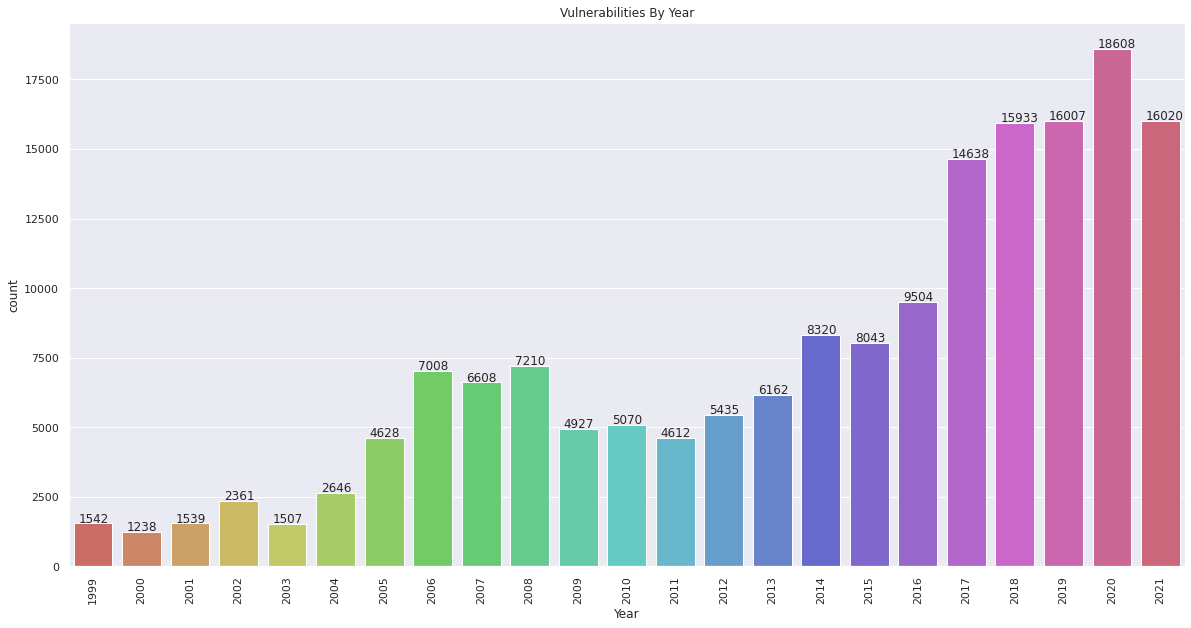

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Year", data=data,palette="hls")
ax.set_title("Vulnerabilities By Year")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

The  following bar chart shows the reported vulnerabilities by year as above. However, it is also divided according to severity. When we examine the graph, we observe that the vulnerabilities are mostly in the middle and high range.

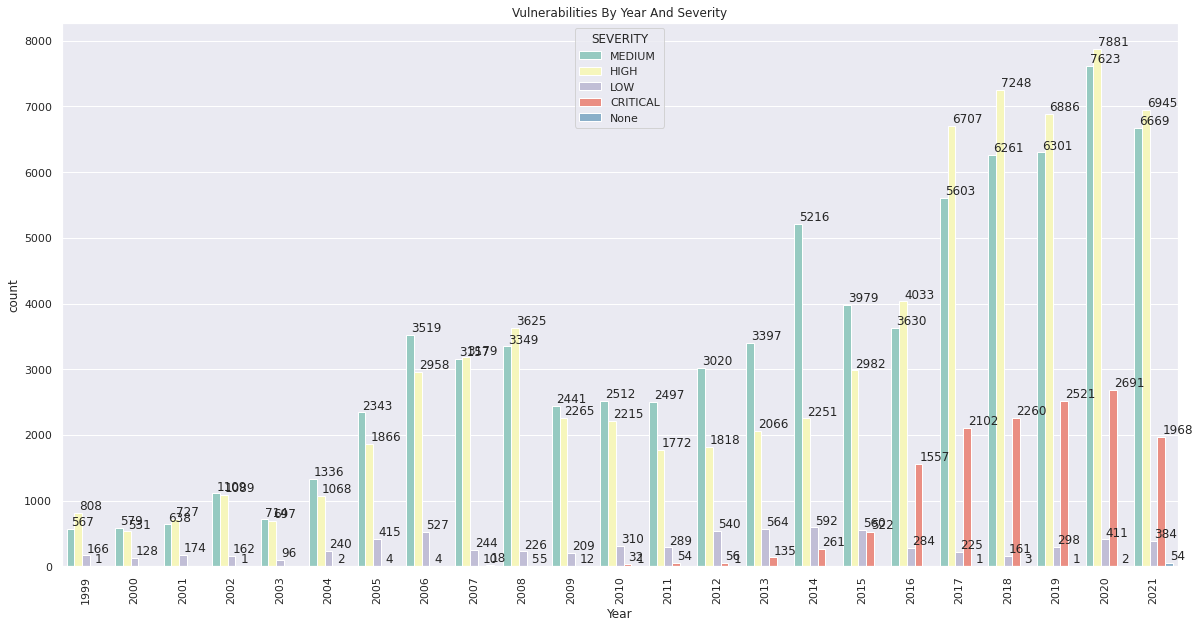

In [6]:

plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Year", data=data,palette="Set3",hue="SEVERITY")
ax.set_title("Vulnerabilities By Year And Severity")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

Following wordcloud is derived according to the most used words in the "description" column of the dataset.

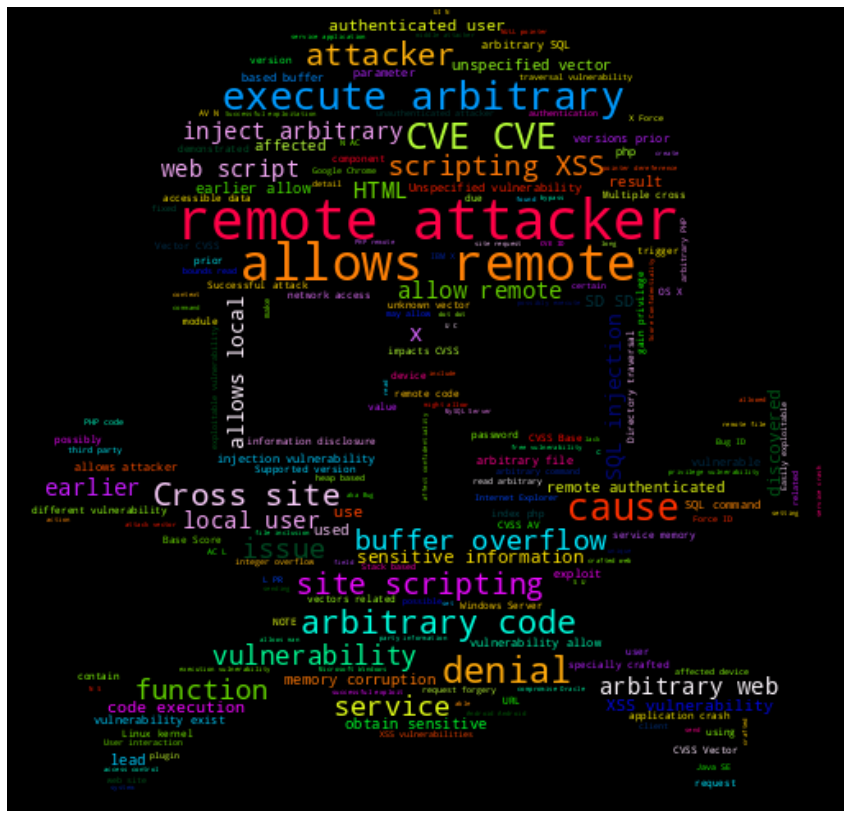

In [7]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
wave_mask= np.array(Image.open("../input/skullll/sk.png"))
text = " ".join(desc for desc in data.DESCRIPTION)
stopwords = set(STOPWORDS)
stopwords.update(["will","announcing","via","none"])
word_cloud = WordCloud(mask=wave_mask, background_color = 'black',colormap="gist_ncar",contour_width=1, stopwords=stopwords,contour_color="black").generate(text)
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. HARDWARE DESIGN DATASET

This dataset is a subset to Global_Dataset contains only those vulnerabilities whose CWE category is present in the Hardware Design Hierarchy. The general information of vulnerability includes CVE-ID, Description, Severity, CWE-Name, CWE-ID.

In [8]:
dataHD=pd.read_excel("../input/cve-and-cwe-mapping-dataset/Hardware Design/HD_Vulnerability_Dataset.xlsx")

In [9]:
year_list=[]
for i in range(0,len(dataHD["CVE-ID"])):
    a=dataHD["CVE-ID"][i].split("-")[1]
    year_list.append(a)

dataHD.insert(loc=2, column='Year', value=year_list)

In [10]:
df2011=dataHD[dataHD.Year=="2011"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2012=dataHD[dataHD.Year=="2012"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2013=dataHD[dataHD.Year=="2013"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2014=dataHD[dataHD.Year=="2014"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2015=dataHD[dataHD.Year=="2015"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2016=dataHD[dataHD.Year=="2016"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2017=dataHD[dataHD.Year=="2017"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2018=dataHD[dataHD.Year=="2018"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2019=dataHD[dataHD.Year=="2019"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2020=dataHD[dataHD.Year=="2020"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2021=dataHD[dataHD.Year=="2021"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2022=dataHD[dataHD.Year=="2022"]["CWE-NAME"].value_counts().to_frame().reset_index()

#### Following pie charts show percentage of Hardware Design Vulnerabilities according to CWE Name between 2011-2021. Especially, Incorrect default permissions are the most common type of vulnerability.

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px
fig = make_subplots(rows=3, cols=4,  subplot_titles=("2011", "2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"),
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(labels=df2011["index"].values, values=df2011["CWE-NAME"].values,name=2011 ) ,row=1, col=1)
fig.add_trace(go.Pie(labels=df2012["index"].values, values=df2012["CWE-NAME"].values,name=2012) ,row=1, col=2)
fig.add_trace(go.Pie(labels=df2013["index"].values, values=df2013["CWE-NAME"].values,name=2013) ,row=1, col=3)
fig.add_trace(go.Pie(labels=df2014["index"].values, values=df2014["CWE-NAME"].values,name=2014) ,row=1, col=4)
fig.add_trace(go.Pie(labels=df2015["index"].values, values=df2015["CWE-NAME"].values,name=2015) ,row=2, col=1)
fig.add_trace(go.Pie(labels=df2016["index"].values, values=df2016["CWE-NAME"].values,name=2016) ,row=2, col=2)
fig.add_trace(go.Pie(labels=df2017["index"].values, values=df2017["CWE-NAME"].values,name=2017) ,row=2, col=3)
fig.add_trace(go.Pie(labels=df2018["index"].values, values=df2018["CWE-NAME"].values,name=2018) ,row=2, col=4)
fig.add_trace(go.Pie(labels=df2019["index"].values, values=df2019["CWE-NAME"].values,name=2019) ,row=3, col=1)
fig.add_trace(go.Pie(labels=df2020["index"].values, values=df2020["CWE-NAME"].values,name=2020) ,row=3, col=2)
fig.add_trace(go.Pie(labels=df2021["index"].values, values=df2021["CWE-NAME"].values,name=2021) ,row=3, col=3)
fig.add_trace(go.Pie(labels=df2022["index"].values, values=df2022["CWE-NAME"].values,name=2022) ,row=3, col=4)

fig.update_traces(hoverinfo='label+percent', textfont_size=15,textposition='inside',
                  marker=dict(line=dict(color='red', width=2)))


fig.update_layout(height=900, width=1700, colorway=px.colors.sequential.Electric , 
                  title_text="Percentage of Hardware Design Vulnerabilities between 2011-2021")

fig.show()

#### The following chart shows the average cvss-v2 scores by year and CVE Name. Incorrect default permission shows average score values in the ranges of 4.1-7.7, Observable Discrepancy 3.38-5, Unintended Proxy or Intermediary 4.6-6.4.

#### Missing Protection Against Hardware Reverse Engineering Using Integrated Circut(IC) is reported in 2021 and Missing Cryptographic Step and Expected Behavior Violation in 2019

In [12]:
import plotly.express as px

fig = px.histogram(dataHD, x="CVSS-V2", histfunc='avg',y="Year",color="CWE-NAME",orientation='h', height=700,width=1500,text_auto='.2s',title="Hardware Design- Average CVSS-V2 Score by CWE NAME and Year")
fig.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

### 3. SOFTWARE DEVELOPMENT DATASET

This dataset is a subset to Global_Dataset contains only those vulnerabilities whose CWE category is present in the Software Development Hierarchy. The general information of vulnerability includes CVE-ID, Description, Severity, CWE-Name, CWE-ID.

In [13]:
dataSD=pd.read_excel("../input/cve-and-cwe-mapping-dataset/Software Development/SD_Vulnerability_Dataset.xlsx")

In [14]:
year_list=[]
for i in range(0,len(dataSD["CVE-ID"])):
    a=dataSD["CVE-ID"][i].split("-")[1]
    year_list.append(a)

dataSD.insert(loc=2, column='Year', value=year_list)

In [15]:
dfs2014=dataSD[dataSD.Year=="2014"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2015=dataSD[dataSD.Year=="2015"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2016=dataSD[dataSD.Year=="2016"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2017=dataSD[dataSD.Year=="2017"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2018=dataSD[dataSD.Year=="2018"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2019=dataSD[dataSD.Year=="2019"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2020=dataSD[dataSD.Year=="2020"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2021=dataSD[dataSD.Year=="2021"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]


Following pie charts show number of top 20 Software Development Vulnerabilities according to CWE Name between 2014-2021. Cross site scripting has been the most reported vulnerability in all 8 years.

In [16]:

import plotly.express as px
fig = make_subplots(rows=2, cols=4,  subplot_titles=("2014", "2015", "2016","2017","2018","2019","2020","2021"),
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(labels=dfs2014["index"].values, values=dfs2014["CWE-NAME"].values,name=2014) ,row=1, col=1)
fig.add_trace(go.Pie(labels=dfs2015["index"].values, values=dfs2015["CWE-NAME"].values,name=2015) ,row=1, col=2)
fig.add_trace(go.Pie(labels=dfs2016["index"].values, values=dfs2016["CWE-NAME"].values,name=2016) ,row=1, col=3)
fig.add_trace(go.Pie(labels=dfs2017["index"].values, values=dfs2017["CWE-NAME"].values,name=2017) ,row=1, col=4)
fig.add_trace(go.Pie(labels=dfs2018["index"].values, values=dfs2018["CWE-NAME"].values,name=2018) ,row=2, col=1)
fig.add_trace(go.Pie(labels=dfs2019["index"].values, values=dfs2019["CWE-NAME"].values,name=2019) ,row=2, col=2)
fig.add_trace(go.Pie(labels=dfs2020["index"].values, values=dfs2020["CWE-NAME"].values,name=2020) ,row=2, col=3)
fig.add_trace(go.Pie(labels=dfs2021["index"].values, values=dfs2021["CWE-NAME"].values,name=2021) ,row=2, col=4)

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,textposition='inside',
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(height=800, width=1700,colorway=px.colors.qualitative.D3_r,
                  title_text="Number of Top 20 Software Development Vulnerabilities between 2014-2021")

fig.show()